# Comparing Principal Component Analysis (PCA) with an Autoencoder

In this notebook, we'll do a qualitative comparison of two methods for reducing dimensionality: principal component analysis (PCA) and an autoencoder. We'll use the MNIST dataset of 70000 28x28 pixel grayscale images of handwritten digits.

The digital images in the MNIST database are considered 784-dimensional vectors. We will use PCA and an autoencoder to reduce the number of dimensions to 40 (~20:1 compression).

In [1]:
import numpy as np
import matplotlib.image as mpi
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape,x_test.shape)

lower_dim = 784//2

(60000, 784) (10000, 784)


# PCA on MNIST data

In [3]:
pca = PCA(n_components = lower_dim)
pca.fit(x_train)

explained_var_ratio = sum(pca.explained_variance_ratio_)
print('PCA with {} components explains ~{:.4f}% of variance'.format(lower_dim, 100*explained_var_ratio))

PCA with 392 components explains ~99.5264% of variance


In [4]:
# Encode and decode the test set

transformed_test = pca.fit_transform(x_test)
reconstruct_test = pca.inverse_transform(transformed_test)

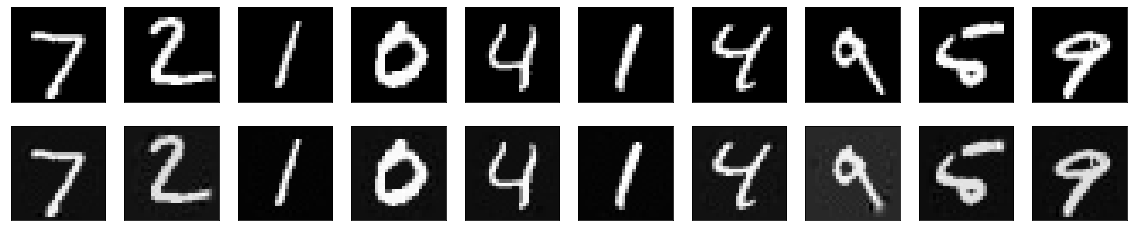

In [5]:
# Display the results

n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstruct_test[i].reshape(28, 28), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Autoencoder for MNIST data

This code is taken from [The Keras Blog](https://blog.keras.io/building-autoencoders-in-keras.html) written by Francois Chollet (the creator of keras).

In [6]:
# Creating the Input layer
input_img = Input(shape=(784,))

# This Dense layer represents the encoded input
encoded = Dense(lower_dim, activation='relu')(input_img)

# This Dense layer represents the decoded input
decoded = Dense(784, activation='sigmoid')(encoded)

# The complete Model to take an image from the Input layer to its decoded reconstruction
autoencoder = Model(input_img, decoded)

In [7]:
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [8]:
# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(lower_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [9]:
# Assemble the model layers
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
# Train the neural network
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test));

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 85us/step - loss: 0.3151 - val_loss: 0.2474
Epoch 2/25
60000/60000 [==============================] - 4s 74us/step - loss: 0.2298 - val_loss: 0.2114
Epoch 3/25
60000/60000 [==============================] - 4s 75us/step - loss: 0.2007 - val_loss: 0.1887
Epoch 4/25
60000/60000 [==============================] - 4s 73us/step - loss: 0.1822 - val_loss: 0.1737
Epoch 5/25
60000/60000 [==============================] - 5s 76us/step - loss: 0.1694 - val_loss: 0.1627
Epoch 6/25
60000/60000 [==============================] - 5s 84us/step - loss: 0.1597 - val_loss: 0.1541
Epoch 7/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.1518 - val_loss: 0.1469
Epoch 8/25
60000/60000 [==============================] - 6s 94us/step - loss: 0.1452 - val_loss: 0.1408
Epoch 9/25
60000/60000 [==============================] - 7s 111us/step - loss: 0.1395 - val_loss: 0.1354
Epoc

In [11]:
# Encode and decode the test set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

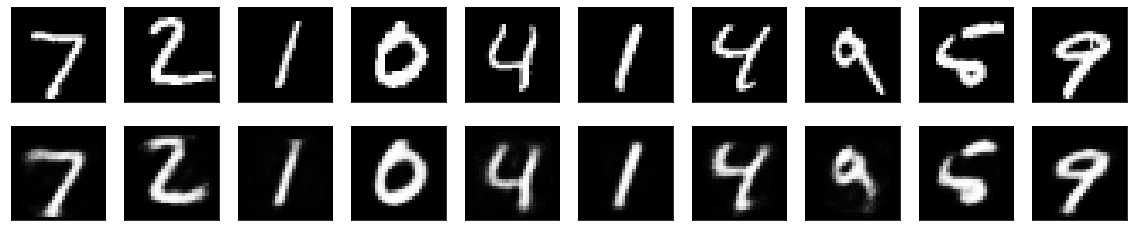

In [12]:
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Side-by-side comparison of the results

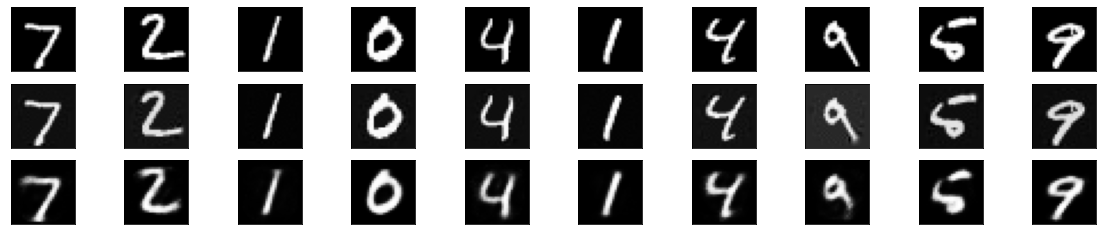

In [13]:
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    ax.get_xaxis().set_visible(False);
    ax.get_yaxis().set_visible(False);

    # Display reconstructions
    
    # PCA
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstruct_test[i].reshape(28, 28), cmap = 'gray')
    ax.get_xaxis().set_visible(False);
    ax.get_yaxis().set_visible(False);
    
    # Autoencoder
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap = 'gray')
    ax.get_xaxis().set_visible(False);
    ax.get_yaxis().set_visible(False);